# Overview

## What to Predict

- Stage 1 - You should submit predicted probabilities for every possible matchup in the past 5 NCAA® tournaments (seasons 2015-2019).
- Stage 2 - You should submit predicted probabilities for every possible matchup before the 2020 tournament begins.

Refer to the [Timeline page](https://www.kaggle.com/c/google-cloud-ncaa-march-madness-2020-division-1-mens-tournament/overview/timeline) for specific dates. In both stages, the sample submission will tell you which games to predict.

# Import Packages

In [3]:
import os

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra

import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 6
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Data Download

In [4]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# Data Import

In [5]:
def get_file_list(datapath):
    # create a list of file and sub directories 
    # names in the given directory 
    data_list = os.listdir(datapath)
    all_files = list()
    # Iterate over all the entries
    for entry in data_list:
        # Create full path
        full_path = os.path.join(datapath, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(full_path):
            all_files = all_files + get_file_list(full_path)
        else:
            all_files.append(full_path)
                
    return all_files

In [7]:
main_path = '/kaggle/input/google-cloud-ncaa-march-madness-2020-division-1-mens-tournament/'
sub_folders = next(os.walk(main_path))[1]
sub_folders

StopIteration: 

In [5]:
datapath = main_path + sub_folders[0] + '/'


# Get the list of all files in directory tree at given path
data_list = get_file_list(datapath)
data_list

['/kaggle/input/google-cloud-ncaa-march-madness-2020-division-1-mens-tournament/MDataFiles_Stage1/Cities.csv',
 '/kaggle/input/google-cloud-ncaa-march-madness-2020-division-1-mens-tournament/MDataFiles_Stage1/MTeamCoaches.csv',
 '/kaggle/input/google-cloud-ncaa-march-madness-2020-division-1-mens-tournament/MDataFiles_Stage1/MTeamSpellings.csv',
 '/kaggle/input/google-cloud-ncaa-march-madness-2020-division-1-mens-tournament/MDataFiles_Stage1/MMasseyOrdinals.csv',
 '/kaggle/input/google-cloud-ncaa-march-madness-2020-division-1-mens-tournament/MDataFiles_Stage1/MSeasons.csv',
 '/kaggle/input/google-cloud-ncaa-march-madness-2020-division-1-mens-tournament/MDataFiles_Stage1/MTeams.csv',
 '/kaggle/input/google-cloud-ncaa-march-madness-2020-division-1-mens-tournament/MDataFiles_Stage1/MSecondaryTourneyTeams.csv',
 '/kaggle/input/google-cloud-ncaa-march-madness-2020-division-1-mens-tournament/MDataFiles_Stage1/MNCAATourneyCompactResults.csv',
 '/kaggle/input/google-cloud-ncaa-march-madness-202

In [6]:
tourney_compact_result_M = pd.read_csv(datapath + 'MNCAATourneyCompactResults.csv')
tourney_seed_M = pd.read_csv(datapath + 'MNCAATourneySeeds.csv')
regular_compact_result_M = pd.read_csv(datapath + 'MRegularSeasonCompactResults.csv')
season_M = pd.read_csv(datapath + 'MSeasons.csv')
teams_M = pd.read_csv(datapath + 'MTeams.csv')

submission_file = pd.read_csv(main_path + 'MSampleSubmissionStage1_2020.csv')

# Data Exploratory Analysis

- for each data we will:
    - handle missing values
    - find-out correlation between variables

## Section 1 - The Basics

### Tourney Compact Result

In [7]:
tourney_compact_result_M.info()
tourney_compact_result_M

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2251 entries, 0 to 2250
Data columns (total 8 columns):
Season     2251 non-null int64
DayNum     2251 non-null int64
WTeamID    2251 non-null int64
WScore     2251 non-null int64
LTeamID    2251 non-null int64
LScore     2251 non-null int64
WLoc       2251 non-null object
NumOT      2251 non-null int64
dtypes: int64(7), object(1)
memory usage: 140.8+ KB


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0
...,...,...,...,...,...,...,...,...
2246,2019,146,1120,77,1246,71,N,1
2247,2019,146,1277,68,1181,67,N,0
2248,2019,152,1403,61,1277,51,N,0
2249,2019,152,1438,63,1120,62,N,0


[]

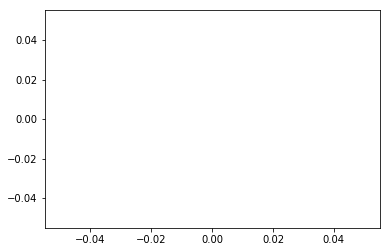

In [30]:
seasonal = tourney_compact_result_M.groupby("Season").sum()
plt.plot(seasonal['WScore'])

In [8]:
tourney_seed_M.info()
tourney_seed_M

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2286 entries, 0 to 2285
Data columns (total 3 columns):
Season    2286 non-null int64
Seed      2286 non-null object
TeamID    2286 non-null int64
dtypes: int64(2), object(1)
memory usage: 53.7+ KB


,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374
...,...,...,...
2281,2019,Z12,1332
2282,2019,Z13,1414
2283,2019,Z14,1330
2284,2019,Z15,1159


In [9]:
regular_compact_result_M.info()
regular_compact_result_M

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161552 entries, 0 to 161551
Data columns (total 8 columns):
Season     161552 non-null int64
DayNum     161552 non-null int64
WTeamID    161552 non-null int64
WScore     161552 non-null int64
LTeamID    161552 non-null int64
LScore     161552 non-null int64
WLoc       161552 non-null object
NumOT      161552 non-null int64
dtypes: int64(7), object(1)
memory usage: 9.9+ MB


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0
...,...,...,...,...,...,...,...,...
161547,2019,132,1153,69,1222,57,N,0
161548,2019,132,1209,73,1426,64,N,0
161549,2019,132,1277,65,1276,60,N,0
161550,2019,132,1387,55,1382,53,N,0


In [10]:
season_M.info()
season_M

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
Season     36 non-null int64
DayZero    36 non-null object
RegionW    36 non-null object
RegionX    36 non-null object
RegionY    36 non-null object
RegionZ    36 non-null object
dtypes: int64(1), object(5)
memory usage: 1.8+ KB


,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/2/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast
5,1990,10/30/1989,East,Midwest,Southeast,West
6,1991,10/29/1990,East,Southeast,Midwest,West
7,1992,11/4/1991,East,West,Midwest,Southeast
8,1993,11/2/1992,East,Midwest,Southeast,West
9,1994,11/1/1993,East,Southeast,Midwest,West


In [11]:
teams_M.info()
teams_M

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 4 columns):
TeamID           367 non-null int64
TeamName         367 non-null object
FirstD1Season    367 non-null int64
LastD1Season     367 non-null int64
dtypes: int64(3), object(1)
memory usage: 11.6+ KB


,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2020
1,1102,Air Force,1985,2020
2,1103,Akron,1985,2020
3,1104,Alabama,1985,2020
4,1105,Alabama A&M,2000,2020
...,...,...,...,...
362,1463,Yale,1985,2020
363,1464,Youngstown St,1985,2020
364,1465,Cal Baptist,2019,2020
365,1466,North Alabama,2019,2020


# Reference
- Primary: [google-cloud-ncaa-march-madness-2020-division-1-mens-tournament](https://www.kaggle.com/c/google-cloud-ncaa-march-madness-2020-division-1-mens-tournament)
- Secondary:

## 5.1 Section 0 - Submission File

In [ ]:
submission_file

In [ ]:
# Spliting ID into 3 different columns
submission_file['Season'] = submission_file['ID'].apply(lambda x: x.split("_")[0])
submission_file['lower_team'] = submission_file['ID'].apply(lambda x: x.split("_")[1])
submission_file['higher_team'] = submission_file['ID'].apply(lambda x: x.split("_")[2])

# Reorder the columns to move the target variable to the end
cols = ["ID", "Season", "lower_team", "higher_team", "Pred"]

# apply the corrected column order to the data frame
submission_file = submission_file[cols]
submission_file